In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import train_test_split
import imblearn #Major library - Please ensure this is installed
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

#-------------------------------------------------------------------
import statsmodels #Install if not present readily
import xgboost as xgb
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")


random.seed(100)

## Loading Data 
In this notebook, we are using the credit card fraud detection dataset. Since a fraud occurs rarely, the target variable is severely imbalanced, making it a perfect case to solve through different sampling & feature selection methods as prescribed below. The link and detailed description to the original data can be found here : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
dataset = pd.read_csv(r"../input/creditcardfraud/creditcard.csv")

#------------------------------------------------------------------------------------------------
#Summary
print('Total Shape :',dataset.shape)
dataset.head()

Total Shape : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## About the dataset:
1. The dataset consists of 29 principal components already extracted in the source dataset. The column names have been anonymized for business confidentiality purpose 
2. The time column is for he purpose level and the Class column is the target variable we aim to predict 
3. Since the features are the principal components themselves, we do not need to apply any scaling methods on it

### Null Check  

In [4]:
pd.DataFrame(dataset.isnull().sum()).T 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Minority Class contribution in the dataset 

In [5]:
print('Total fraud(Class = 1) and not-fraud(Class = 0) :\n',dataset['Class'].value_counts())
print('Percentage of minority samples over total Data :',100 * dataset[dataset['Class']==1].shape[0]/dataset.shape[0],'%')

Total fraud(Class = 1) and not-fraud(Class = 0) :
 0    284315
1       492
Name: Class, dtype: int64
Percentage of minority samples over total Data : 0.1727485630620034 %


## Insight:
1. The %contribution of Class 1 i.e fraud is abysmally low (~0.17%), hence the model will not be able to learn properly on the patterns of a fraud and hence the prediction quality will be poor. 
2. To remediate the above case, we have an array of sampling techniques at our disposal which lead us to overcome the problem of imbalance classification

# Note (Important) : 
1. For this dataset, since we have already established that sampled data works better for a classification model, we will proceed with considering sampled data for the next step of feature selection (Works good for sampled/un-sampled) 
2. The features in this data are the principal components, not the raw features themselves. Its not general practice to run feature selection algorithms on Principal Components, but since we have 29 principal components (also, we dont have the information how much variance is explained for each of these principal components, hence we are assuming the eigen values/explained variances are distributed among many PC's, and hence we'd still want to eliminate the negligible impact PC features 

#### UDF for 3-D ploting of the sampled sets 

In [6]:
def plot_3d(df,col1,col2,col3,hue_elem,name):
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df[col1], df[col2], df[col3], c=df[hue_elem], marker='o')

    title = 'Scatter plot for :' + name
    ax.set_title(title)
    ax.set_xlabel(col1+' Label')
    ax.set_ylabel(col2+' Label')
    ax.set_zlabel(col3+' Label')
    
    plt.show()
    

### Splitting the data

In [7]:
# Test Train Split for modelling purpose
X = dataset.loc[:,[cols for cols in dataset.columns if ('Class' not in cols) & ('Time' not in cols)]] #Removing time since its a level column
y = dataset.loc[:,[cols for cols in dataset.columns if 'Class' in cols]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=100)

#----------------------------------------------------------------------------------------------------
print('Total Shape of Train X:',X_train.shape)
print('Total Shape of Train Y:',y_train.shape)

Total Shape of Train X: (190820, 29)
Total Shape of Train Y: (190820, 1)


#### Random Undersampling
Reference Links - https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Total datapoints : (209560, 30)
Percentage of minority samples over Training Data : 9.104313800343578 %


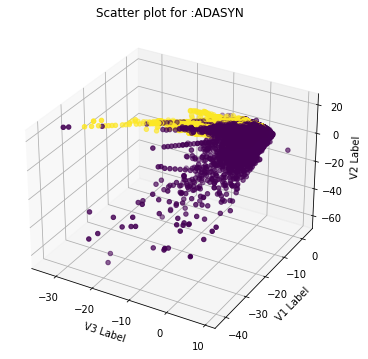

In [8]:
# transform the dataset
from imblearn.over_sampling import ADASYN 

adasyn = ADASYN(sampling_strategy=0.10,n_neighbors=5,random_state=100,n_jobs=-1)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

#-----------------------------------------------------------------------------------
train_adasyn = X_train_adasyn.join(y_train_adasyn)
print('Total datapoints :',train_adasyn.shape)
print('Percentage of minority samples over Training Data :',
      100 * train_adasyn[train_adasyn['Class']==1].shape[0]/train_adasyn.shape[0],'%')


#--------------------------------------------------------------------------------------
plot_3d(train_adasyn,'V3','V1','V2','Class','ADASYN')


### Passing under-sampled data into model for training

In [9]:
## Final X-Y pair of training to pass
X_train_final = X_train_adasyn.copy()
y_train_final = y_train_adasyn.copy()

#-----------------------------------------------------------------------------
train_final = X_train_final.join(y_train_final)
print('Percentage of minority samples over Final Training Data :',
      100 * train_final[train_final['Class']==1].shape[0]/train_final.shape[0],'%')

Percentage of minority samples over Final Training Data : 9.104313800343578 %


In [10]:
train_final.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.727945,-0.253614,0.951309,2.596187,-0.80678,-0.105885,-0.073429,0.14587,-0.626549,0.76545,1.143839,0.033947,-1.254873,0.630418,0.171258,1.180275,-0.833965,0.387761,-0.888123,0.176962,0.00954,-0.57917,-0.01041,0.459409,0.015816,-0.260018,-0.037694,0.057548,199.0,0


## Baseline - Logistic Regression Model on fairly balanced data (~9%) with no feature selection 

In [11]:
lr_clf = LogisticRegression(solver='saga',random_state=100)
lr_clf.fit(X_train_final,y_train_final)
pred = lr_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, pred))
print('3. Classification Report -\n',classification_report(y_test, pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, pred))

1. ROC AUC: 0.873
2. Accuracy : 0.981401683211508
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     93834
           1       0.06      0.76      0.12       153

    accuracy                           0.98     93987
   macro avg       0.53      0.87      0.55     93987
weighted avg       1.00      0.98      0.99     93987

4. Confusion Matrix - 
 [[92122  1712]
 [   36   117]]


In [12]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=100,n_jobs=-1)
xgb_clf.fit(X_train_final,y_train_final)
xgb_pred = xgb_clf.predict(X_test)

#-----------------------------------------------
score = roc_auc_score(y_test, xgb_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, xgb_pred))
print('3. Classification Report -\n',classification_report(y_test, xgb_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, xgb_pred))

[04:29:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1. ROC AUC: 0.912
2. Accuracy : 0.9994999308414994
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.86      0.82      0.84       153

    accuracy                           1.00     93987
   macro avg       0.93      0.91      0.92     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93814    20]
 [   27   126]]


# Feature Selection Techniques:
1. Quality Based:
    1. Variance Inflation Factor (VIF)**
    2. Correlation (Pearson/Spearman)** (Not applicable for classification problems)
2. Performance (Fit of a model) based:
    1. Intrinsic Techniques:
        - Lasso/Logistic Regression Feature Selection**
        - XGBoost/Random Forest Feature Selection
    2. Extrinsic Techniques (Wrapper Based Methods):
        - Recursive Feature Elimination w/ Cross Validation (RFECV) 
        - Relative Importance**
        - Boruta
        
** - If satisfying the basic assumptions

## Variance Inflation Factor (VIF) to detect multi-collinearity
1. Multi-collinearity: If two or more features correlated to each other highly
2. Not removing multi-collinear features result in violation of linear assumptions in many modelling algorithms, hence unnatural predictions
3. ASSUMPTIONS - every assumption of linear regression is valid here

Relevant Links - https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [13]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#------------------------------------------------------------------------------------
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#------------------------------------------------------------------------------------
X_VIF = calc_vif(X_train_final)
X_VIF = X_VIF.sort_values(['VIF'],ascending=False) #Sorting by descending order
X_VIF[X_VIF['VIF']>4] #Filtering for above 4

,variables,VIF
28,Amount,6.099533


#### Insight : 
1. The VIF has a range of [1,inf)
2. For columns having VIF>5 (4 at some cases like above), they are considered to be multi-collinear and hence should be removed sequentially and checking the VIF again, till there are no features with higher VIF present

## Lasso/Logistic Regression Feature Selection 
1. ASSUMPTION : Strictly same as of linear regression 
2. Lasso for regression problems, logistic regression with regularization for classification

Relevant Links - 
    1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    2.https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [14]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='saga'))
sel_.fit(X_train_final, y_train_final)

#--------------------------------------------------------------------------------
selected_feat = X_train_final.columns[(sel_.get_support())]
selected_feat

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

## Tree-Based Feature Selection
1. Corresponding trees are taken to match with modelling step. Example - If the final model is XGBoost, the same model can be taken for feature selection for better reliability and consistency as well. 
2. Calculates feature importances based on Gini Purity Gain, Coverage of nodes, frequency,Gain in MSE etc.

Relevent Links - https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training

In [15]:
my_model = xgb.XGBClassifier(random_state=100)
my_model.fit(X_train_final,y_train_final)

#----------------------------------------------------------------------------------------------------------
feature_importances = pd.DataFrame(my_model.feature_importances_,
                                   index = X_train_final.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances['Features'] = feature_importances.index
feature_importances = feature_importances[['Features','importance']]
feature_importances.reset_index(inplace=True)
feature_importances.drop(columns={'index'},inplace=True)

#----------------------------------------------------------------------------------------------------------
print(feature_importances.head(5))

[04:30:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  Features  importance
0      V14    0.387940
1       V4    0.069391
2      V10    0.059476
3      V12    0.049156
4      V17    0.041138


### Insights:
1. The above are the top 5 feaures contributing to the prediction of 'Class' with V14 being the highest with 57% importance, followed by V17 at 9%
2. A threshold for the features to select can be tuned by an iterative process (input into model and check evaluation). Ex - Pick all featues having atleast 1% importance  
3. Same methd can be used for other tree based models like CART, RF, LGBM etc. 

## RFECV (Recursive Feature Selection with Cross Validation) 
1. A wrapper method, hence uses a model within itself (any model passed by the user)
2. For this example, we will pass the XGB model we fit above

Relevant Links - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [16]:
from sklearn.feature_selection import RFECV
warnings.filterwarnings("ignore")

estimator = xgb.XGBClassifier(random_state=100,n_jobs=-1) 

selector = RFECV(estimator, step=2, cv=3, n_jobs=-1, scoring = 'f1_weighted') #For example purpose, step=3, use step=1 or 2 in real time

selector.fit(X_train_final,y_train_final)

[05:07:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:08:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:09:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:10:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RFECV(cv=3,
      estimator=XGBClassifier(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None,
                              random_state=100, reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=None,
                              verbosity=None),
      n_jobs=-1, scoring='f1_weighted', step=2)

#### Post-Processing for RFECV to extract out the exact columns to pick

In [17]:
selector_mask = list(selector.support_) 
print('1 : ',selector_mask)
print('Length - ',len(selector_mask))
col_list = list(X_train_final.columns)
print('2 : ',col_list)

#--------------------------------------------------------------------------------------------
pass_idx = []

for n, i in enumerate(selector_mask):
  if i == True:
     selector_mask[n] = 1
  elif i == False:
     selector_mask[n] = 0
     
selector_mask

#--------------------------------------------------------------------------------------------

for n,item in enumerate(selector_mask):
 if item == 1:
   a = n
   pass_idx = pass_idx + [n]

print('3 : ',pass_idx,'\n')

final_features = []
for i in pass_idx:
 final_features = final_features + [X_train_final.columns[i]]
 
#--------------------------------------------------------------------------------------------
print('Final Features :')
final_features #The features recommended by the RFECV algorithm

1 :  [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, True]
Length -  29
2 :  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
3 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 25, 26, 28] 

Final Features :


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V21',
 'V23',
 'V25',
 'V26',
 'V27',
 'Amount']

## Boruta Feature Selection
1. It works on the principal of shadow feature creation & multiple Bernoulli's trials 
2. Is an automated version of XGB feature selection (dynamically choosing threshold)

Relevant Links - https://pypi.org/project/Boruta/ 

In [18]:
from boruta import BorutaPy

#------------------------------------------------------------------------
###initialize Boruta
xgb = xgb.XGBClassifier(random_state=100)

boruta = BorutaPy(
  estimator = xgb, 
  n_estimators = 'auto',
  max_iter = 250 # number of trials to perform
)

#------------------------------------------------------------------------
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_train_final), np.array(y_train_final))
### print results
green_area = X_train_final.columns[boruta.support_].to_list()
blue_area = X_train_final.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

[05:11:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:13:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:15:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Insights:
1. Boruta is generally a consevative algorithm and returns lesser features than other algorithms
2. The green area features are those which are absolutely necssary for the model
3. The blue area features are those which are optional for the model. In the above example, there are no optional features

# Improvement on baseline results with Boruta selected features

In [19]:
lr_clf = LogisticRegression(solver='saga',max_iter=10000,random_state=100)

lr_clf.fit(X_train_final[selected_feat],y_train_final) #X filtered for Boruta green features
pred = lr_clf.predict(X_test[selected_feat]) #X filtered for Boruta green features

#----------------------------------------------------------------------------------------
score = roc_auc_score(y_test, pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, pred))
print('3. Classification Report -\n',classification_report(y_test, pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, pred))

1. ROC AUC: 0.911
2. Accuracy : 0.9912221903029143
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     93834
           1       0.14      0.83      0.24       153

    accuracy                           0.99     93987
   macro avg       0.57      0.91      0.62     93987
weighted avg       1.00      0.99      0.99     93987

4. Confusion Matrix - 
 [[93035   799]
 [   26   127]]


In [20]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=100)
xgb_clf.fit(X_train_final[green_area],y_train_final)
xgb_pred = xgb_clf.predict(X_test[green_area])

#-----------------------------------------------
score = roc_auc_score(y_test, xgb_pred)
print('1. ROC AUC: %.3f' % score)
print('2. Accuracy :',accuracy_score(y_test, xgb_pred))
print('3. Classification Report -\n',classification_report(y_test, xgb_pred))
print('4. Confusion Matrix - \n',confusion_matrix(y_test, xgb_pred))

[05:40:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1. ROC AUC: 0.912
2. Accuracy : 0.9994999308414994
3. Classification Report -
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93834
           1       0.86      0.82      0.84       153

    accuracy                           1.00     93987
   macro avg       0.93      0.91      0.92     93987
weighted avg       1.00      1.00      1.00     93987

4. Confusion Matrix - 
 [[93814    20]
 [   27   126]]
